# Import Character Vocab


In [1]:
import numpy as np
import json
import tensorflow as tf

In [2]:
with open('/content/drive/My Drive/files/vocab.json', 'r') as f:
  CHAR_INDICES = json.load(f)

In [3]:
print(CHAR_INDICES)

{' ': 0, ',': 1, '-': 2, '0': 3, '1': 4, '2': 5, '3': 6, '4': 7, '5': 8, '6': 9, '7': 10, '8': 11, '9': 12, 'A': 13, 'B': 14, 'C': 15, 'D': 16, 'E': 17, 'F': 18, 'G': 19, 'H': 20, 'I': 21, 'J': 22, 'K': 23, 'L': 24, 'M': 25, 'N': 26, 'O': 27, 'P': 28, 'Q': 29, 'R': 30, 'S': 31, 'T': 32, 'U': 33, 'V': 34, 'W': 35, 'X': 36, 'Y': 37, 'Z': 38, 'a': 39, 'b': 40, 'c': 41, 'd': 42, 'e': 43, 'f': 44, 'g': 45, 'h': 46, 'i': 47, 'j': 48, 'k': 49, 'l': 50, 'm': 51, 'n': 52, 'o': 53, 'p': 54, 'q': 55, 'r': 56, 's': 57, 't': 58, 'u': 59, 'v': 60, 'w': 61, 'x': 62, 'y': 63, 'z': 64, '<pad>': 65, '<unk>': 66}


# Preprocessing text data

In [4]:
look_back = 10

In [5]:
def create_dataset(text, look_back = look_back):
  X, y = [], []
  text = '|' + text
  data = [CHAR_INDICES['<pad>']] * look_back
  for i in range(1, len(text)):
    current_char = text[i]
    before_char = text[i-1]

    if current_char == '|':
      continue
    data = data[1:] + [CHAR_INDICES[current_char]]  # X data

    target = 1 if before_char == '|' else 0  # y data
    X.append(data)
    y.append(target)
  
  return np.array(X), np.array(y)

In [6]:
def pred_preprocessing(text, sequence_len=10):
  # create dataset
  X = []
  data = [CHAR_INDICES['<pad>']] * sequence_len
  for char in text:
    char = char if char in CHAR_INDICES else '<unk>'  # check char in dictionary
    data = data[1:] + [CHAR_INDICES[char]]  # X data
    X.append(data)
  return np.array(X)

In [7]:
def word_tokenize(text, class_):
    cut_indexs = []
    words = []

    # boolean index of each word 1 if cut before
    class_ = np.append(class_, 1)

    # if y_label at i is 1 so add i (index) to cut_indexs
    for i, value in enumerate(class_):
      if value == 1:
        cut_indexs.append(i)

    # add word after cutting till before ext cutting
    for i in range(len(cut_indexs)-1):
      words.append(text[cut_indexs[i]:cut_indexs[i+1]])
    
    return words

In [8]:
with open('/content/drive/My Drive/files/Dictionary.json', 'r') as f1, open('/content/drive/My Drive/files/Dictionary_cut.json', 'r') as f2:
    Dict = json.load(f1)
    Dict_cut = json.load(f2)

In [9]:
for key, value in Dict.items():
    print(key, len(value))
print('-'*15)
for key, value in Dict_cut.items():
    print(key, len(value))

alkane 10
cyclo_alkane 8
alkene 25
dialkene 69
cyclo_alkene 8
alkyne 9
dialkyne 49
cyclo_alkyne 8
---------------
alkane 10
cyclo_alkane 8
alkene 25
dialkene 69
cyclo_alkene 8
alkyne 9
dialkyne 49
cyclo_alkyne 8


# Create Dataset

In [10]:
last_key = list(Dict.keys())[-1]
print(last_key)

cyclo_alkyne


In [11]:
dataset_cut = ''
for key, value in Dict_cut.items():
    for name in value:
        dataset_cut += name
        if name != Dict_cut[last_key][-1]:
            dataset_cut = dataset_cut + '| |'
    #print(len(dataset_cut.replace('|','')))
print(dataset_cut)
print(len(dataset_cut.replace('|','')))

Meth|ane| |Eth|ane| |Prop|ane| |But|ane| |Pent|ane| |Hex|ane| |Hept|ane| |Oct|ane| |Non|ane| |Dec|ane| |Cyclo|prop|ane| |Cyclo|but|ane| |Cyclo|pent|ane| |Cyclo|hex|ane| |Cyclo|hept|ane| |Cyclo|oct|ane| |Cyclo|non|ane| |Cyclo|dec|ane| |Eth|ene| |Prop|ene| |But|ene| |But|-|2|-|ene| |Pent|ene| |Pent|-|2|-|ene| |Hex|ene| |Hex|-|2|-|ene| |Hex|-|3|-|ene| |Hept|ene| |Hept|-|2|-ene| |Hept|-|3|-|ene| |Oct|ene| |Oct|-|2|-|ene| |Oct|-|3|-|ene| |Oct|-|4|-|ene| |Non|ene| |Non|-|2|-|ene| |Non|-|3|-ene| |Non|-|4|-ene| |Dec|ene| |Dec|-|2|-|ene| |Dec|-|3|-|ene| |Dec|-|4|-|ene| |Dec|-|5|-|ene| |Prop|a|di|ene| |But|a|-|1|,|2|-|di|ene| |But|a|-|1|,|3|-|di|ene| |Pent|a|-|1|,|2|-|di|ene| |Pent|a|-|1|,|3|-|di|ene| |Pent|a|-|1|,|4|-|di|ene| |Pent|a|-|2|,|3|-|di|ene| |Hex|a|-|1|,|2|-|di|ene| |Hex|a|-|1|,|3|-|di|ene| |Hex|a|-|1|,|4|-|di|ene| |Hex|a|-|1|,|5|-|di|ene| |Hex|a|-|2|,|3|-|di|ene| |Hex|a|-|2|,|4|-|di|ene| |Hept|a|-|1|,|2|-|di|ene| |Hept|a|-|1|,|3|-|di|ene| |Hept|a|-|1|,|4|-|di|ene| |Hept|a|-|1|,|5|-|d

In [12]:
dataset = ""
for key, value in Dict.items():
  for name in value:
    dataset += name
    if name != Dict[last_key][-1]:
      dataset = dataset + ' '
  #print(len(dataset.replace('|','')))
print(dataset)
print(len(dataset))

Methane Ethane Propane Butane Pentane Hexane Heptane Octane Nonane Decane Cyclopropane Cyclobutane Cyclopentane Cyclohexane Cycloheptane Cyclooctane Cyclononane Cyclodecane Ethene Propene Butene But-2-ene Pentene Pent-2-ene Hexene Hex-2-ene Hex-3-ene Heptene Hept-2-ene Hept-3-ene Octene Oct-2-ene Oct-3-ene Oct-4-ene Nonene Non-2-ene Non-3-ene Non-4-ene Decene Dec-2-ene Dec-3-ene Dec-4-ene Dec-5-ene Propadiene Buta-1,2-diene Buta-1,3-diene Penta-1,2-diene Penta-1,3-diene Penta-1,4-diene Penta-2,3-diene Hexa-1,2-diene Hexa-1,3-diene Hexa-1,4-diene Hexa-1,5-diene Hexa-2,3-diene Hexa-2,4-diene Hepta-1,2-diene Hepta-1,3-diene Hepta-1,4-diene Hepta-1,5-diene Hepta-1,6-diene Hepta-2,3-diene Hepta-2,4-diene Hepta-2,5-diene Hepta-3,4-diene Octa-1,2-diene Octa-1,3-diene Octa-1,4-diene Octa-1,5-diene Octa-1,6-diene Octa-2,3-diene Octa-2,4-diene Octa-2,5-diene Octa-2,6-diene Octa-3,4-diene Octa-3,5-diene Nona-1,2-diene Nona-1,3-diene Nona-1,4-diene Nona-1,5-diene Nona-1,6-diene Nona-1,7-diene Nona

In [13]:
X_train, y = create_dataset(dataset_cut)
X_test = pred_preprocessing(dataset)
print(X_train.shape, y.shape)
print(X_test.shape)

(2452, 10) (2452,)
(2452, 10)


In [14]:
training_data = tf.data.Dataset.from_tensor_slices((X_train,y))
training_data = training_data.batch(128)

# Create Model

## Model Architecture

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Embedding
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [16]:
_input_shape = (look_back, len(CHAR_INDICES))
print(_input_shape[1])

67


In [17]:
Model = Sequential(
    [
     Embedding(len(CHAR_INDICES), _input_shape[1]),
     Bidirectional(LSTM(_input_shape[1]//2, return_sequences=False),
                      merge_mode='sum',
                      weights=None,
                      input_shape=_input_shape),
     Dense(_input_shape[1]//4),
     Dense(1, activation='sigmoid')
    ],
    name='model'
)

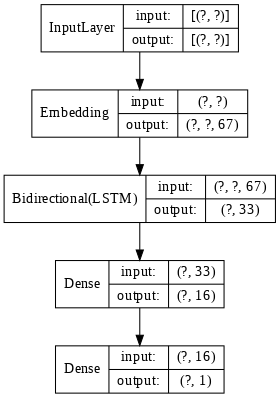

In [18]:
tf.keras.utils.plot_model(Model, show_shapes=True, dpi=74, show_layer_names=False)

## Training Model

In [19]:
Model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
Model.fit(training_data, epochs=10)

Epoch 1/10
20/20 [==============================] - 0s 10ms/step - loss: 0.6688 - accuracy: 0.5861
Epoch 2/10
20/20 [==============================] - 0s 10ms/step - loss: 0.5664 - accuracy: 0.7541
Epoch 3/10
20/20 [==============================] - 0s 10ms/step - loss: 0.4348 - accuracy: 0.7480
Epoch 4/10
20/20 [==============================] - 0s 9ms/step - loss: 0.3090 - accuracy: 0.8630
Epoch 5/10
20/20 [==============================] - 0s 9ms/step - loss: 0.1970 - accuracy: 0.9339
Epoch 6/10
20/20 [==============================] - 0s 9ms/step - loss: 0.1165 - accuracy: 0.9645
Epoch 7/10
20/20 [==============================] - 0s 10ms/step - loss: 0.0772 - accuracy: 0.9829
Epoch 8/10
20/20 [==============================] - 0s 9ms/step - loss: 0.0665 - accuracy: 0.9776
Epoch 9/10
20/20 [==============================] - 0s 10ms/step - loss: 0.0508 - accuracy: 0.9833
Epoch 10/10
20/20 [==============================] - 0s 10ms/step - loss: 0.0432 - accuracy: 0.9861


In [22]:
pred_proba = Model.predict(X_test)
print(pred_proba.round(3))

[[0.926]
 [0.01 ]
 [0.001]
 ...
 [0.973]
 [0.037]
 [0.092]]


In [23]:
pred = np.array([0 if i <= 0.5 else 1 for i in pred_proba])
print("true:", y)
print("predict:",pred)
print("y:",y.shape,"ans:",pred.shape)

true: [1 0 0 ... 1 0 0]
predict: [1 0 0 ... 1 0 0]
y: (2452,) ans: (2452,)


In [30]:
count = 0

for i in range(y.shape[0]):
  if pred[i] == y[i]:
    count += 1
print("True: ",count,"False: ",pred.shape[0]-count)
print("\nConfusion Matrix:")
print(tf.math.confusion_matrix(y, pred, num_classes=2).numpy())

True:  2427 False:  25

Confusion Matrix:
[[1001    4]
 [  21 1426]]


## Test on unseen data

In [25]:
myText = "Benzyl-N,2-dimethylpentan-3-aminoate"
myText_cut = "Benz|yl|-|N|,|2|-|di|meth|yl|pent|an|-|3|-|amin|oate"

In [35]:
myText_test, my_y = create_dataset(myText_cut)
pred_test_proba = Model.predict(myText_test)

pred_test = np.array([0 if i <= 0.5 else 1 for i in pred_test_proba])
print(pred_test)
print(my_y)

count = 0
for i in range(my_y.shape[0]):
  if pred_test[i] == my_y[i]:
    count += 1
print("\nTrue: ",count,"False: ",pred_test.shape[0]-count)

print("\nConfusion Matrix:")
print(tf.math.confusion_matrix(my_y, pred_test, num_classes=2).numpy())

[1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0]
[1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0]

True:  30 False:  6

Confusion Matrix:
[[16  3]
 [ 3 14]]


In [27]:
for i in range(y.shape[0]):
  if pred[i] == y[i]:
    count += 1
print("True: ",count,"False: ",pred.shape[0]-count)words = word_tokenize(myText, pred_test)
print(words)
print('|'.join(words))

['Benzyl', '-', 'N', ',', '2', '-', 'di', 'met', 'h', 'ylpent', 'an', '-', '3', '-', 'a', 'mino', 'ate']
Benzyl|-|N|,|2|-|di|met|h|ylpent|an|-|3|-|a|mino|ate
